Martina Galvan (mg44769) - 8:30 section

Shruti Kolhatkar (sgk637) - 8:30 section

Zeba Pathan (zap352) - 8:30 section

Troy Walton (tdw2395) - 10:30 section

Alexandre Nicolai (an29675) - 10:30 section 

forum: https://forums.edmunds.com/discussion/7526/general/x/midsize-sedans-2-0/ 

# Setup

In [ ]:
# Use this code if using Colab to run Selenium

# Make sure to go to Runtime -> Change runtime type and select Python 3 as runtime type and GPU as hardware accelerator

# !kill -9 -1 # Use this line to delete this VM and start a new one. 
# The above line deletes all files and folders from the current VM and allocates a new one.

!pip install selenium
!apt-get -q update # to update ubuntu to correctly run apt install
!apt install -yq chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 911kB 5.6MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://security.ubun

In [ ]:
import pandas as pd

In [ ]:
#NEED car models and brands.csv from canvas stored locally
#rename it to carbrands.csv

#pull in brand model file from canvas
from google.colab import files
uploaded = files.upload()

import io
models = pd.read_csv(io.BytesIO(uploaded['carbrands.csv']),header = None,names = ['brand','model'])

In [ ]:
from string import punctuation

models = pd.read_csv('carbrands.csv', names=['brand','model'])

def remove(item):
    for p in punctuation:
        item = item.lstrip().replace(p,'')
    return item

models['brand'] = models['brand'].apply(remove)

# Task A

In [ ]:
import pandas as pd
driver = webdriver.Chrome('chromedriver', options=chrome_options)
comments = pd.DataFrame(columns = ['Date','user_id','messages']) 
ids = driver.find_elements_by_xpath("//*[contains(@id,'Comment_')]")
#ids = driver.find_elements_by_xpath("//*[contains(@id,'Comment_')]")
brand_file1 = pd.read_csv('carbrands.csv',index_col= 1, header=None)

def replaceModel(comment):
  for k,v in brand_file1.iterrows():
    comment = comment.replace(k, v[0])
  return comment

j = 1
while (j<=543):
    # Running while loop only till we get 5K comments 
    if (len(comments)<5000):
        url = 'https://forums.edmunds.com/discussion/7526/general/x/midsize-sedans-2-0/p' + str(j)
        driver.get(url)
        ids = driver.find_elements_by_xpath("//*[contains(@id,'Comment_')]")
        comment_ids = []
        for i in ids:
          comment_ids.append(i.get_attribute('id'))
        for x in comment_ids: 
          #Extract dates from for each user on a page
           user_date = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
           date = user_date.get_attribute('title')
           #Extract user ids from each user on a page
           userid_element = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0]
           userid = userid_element.text
           #Extract Message for each user on a page                    
           user_message = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
           comment = user_message.text 
           comment = replaceModel(comment)
           #Adding date, userid and comment for each user in a dataframe  
           comments.loc[len(comments)] = [date,userid,comment]

           
        j=j+1
    else:
        break


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import copy

def lowerize(x):
    return x.lower()

comments_copy = copy.deepcopy(comments)
def remove_space(s):
    return s.replace("\n"," ")

comments_copy['messages'] = comments_copy['messages'].apply(remove_space)

def remove(item):
    for p in punctuation:
        item = item.lstrip().replace(p,'')
    return item
comments_copy['comments_clean'] = comments_copy['messages'].apply(remove).apply(lowerize)
models['brand'] = models['brand'].apply(remove)

def model_to_brand(s):
    for i in models.index.values:
        s = s.replace(models["model"][i].lower(),models["brand"][i].lower())
    return s
comments_copy['comments_model_replace'] = comments_copy['comments_clean'].apply(model_to_brand)
comments_copy['comments_appear'] = comments_copy['comments_model_replace'].apply(word_tokenize).apply(set).apply(list)

# Remove stop words
stop_words = set(stopwords.words('english'))
def remove_stopwords(s):
    return [w for w in s if not w in stop_words] 

comments_copy['final_comments'] =  comments_copy['comments_appear'].apply(remove_stopwords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
count = []
for i in range(len(comments_copy)):
    count+=comments_copy['final_comments'][i]

from nltk import FreqDist
word_freq = nltk.FreqDist(count)

models = models[~(models['brand']=='car')]
models = models[~(models['brand']=='seat')]
models = models[~(models['brand']=='problem')]
models = models[~(models['brand']=='sedan')]

models_unique = models['brand'].drop_duplicates().tolist()

model_names = models['brand'].unique()

top_words = word_freq.most_common(500)
top_brands = []
for (key, items) in top_words:
    if key in models_unique:
        model_counts = (key,items)
        top_brands.append(model_counts)

top_brands_counts = top_brands
print ('Below are the top 10 brands along with their frequencies\n' , top_brands_counts[:10])

Below are the top 10 brands along with their frequencies
 [('honda', 2091), ('ford', 1359), ('toyota', 989), ('hyundai', 571), ('nissan', 569), ('mazda', 329), ('chevrolet', 244), ('saturn', 244), ('chrysler', 225), ('subaru', 156)]


In [ ]:

# Fetching the top 10 brands.
top_13_brands =[]
for brand, count in top_brands_counts:
    top_13_brands.append(brand)

new_df = pd.DataFrame(columns = top_13_brands)

def brand_mentioned(item):
    if brand in item:
        return 1
    else:
        return 0
      
for brand in top_13_brands:
    new_df[brand] = comments_copy['final_comments'].apply(brand_mentioned)


# Calculating lift among top brands
df2=pd.DataFrame(columns = top_13_brands)
for i in range(len(top_13_brands)):
    new_list = []
    for j in range(len(top_13_brands)):
        if (i!=j):
            numerator = ((new_df[top_13_brands[i]] + new_df[top_13_brands[j]]) > 1).sum()
            denominator = new_df[top_13_brands[j]].sum()*new_df[top_13_brands[i]].sum()
            lift = numerator*len(new_df)/denominator
            df2.loc[top_13_brands[i],top_13_brands[j]] = lift
print ('Below are the lift ratios among top brands\n')
df2


Below are the lift ratios among top brands



,honda,ford,toyota,hyundai,nissan,mazda,chevrolet,saturn,chrysler,subaru,kia,bmw,volkswagen
honda,NaN,1.16305,1.69729,1.46571,1.42884,1.07568,1.3328,1.3034,1.33907,1.36421,1.25669,1.17567,1.27192
ford,1.16305,NaN,1.4062,1.19847,1.18975,1.26367,1.34199,1.31184,1.2918,0.89621,1.04736,0.674516,1.01764
toyota,1.69729,1.4062,NaN,1.87704,2.17685,1.07566,1.86477,2.34133,1.19088,1.32872,1.5499,1.64307,1.61349
hyundai,1.46571,1.19847,1.87704,NaN,1.55433,0.984781,1.79438,1.97382,1.55672,2.02075,4.85766,1.75131,1.39732
nissan,1.42884,1.18975,2.17685,1.55433,NaN,1.17521,2.05278,2.84508,1.09354,2.08418,1.41111,1.24487,2.61751
mazda,1.07568,1.26367,1.07566,0.984781,1.17521,NaN,0.934277,1.05885,0.742992,2.63035,0.887449,1.26646,2.7485
chevrolet,1.3328,1.34199,1.86477,1.79438,2.05278,0.934277,NaN,5.71083,2.18579,1.57629,1.7949,1.19536,3.05197
saturn,1.3034,1.31184,2.34133,1.97382,2.84508,1.05885,5.71083,NaN,1.27505,1.83901,2.3932,1.70765,1.96198
chrysler,1.33907,1.2918,1.19088,1.55672,1.09354,0.742992,2.18579,1.27505,NaN,0.997151,2.7575,0.925926,0.945626
subaru,1.36421,0.89621,1.32872,2.02075,2.08418,2.63035,1.57629,1.83901,0.997151,NaN,2.10556,1.86966,3.06874


In [ ]:
print ('Below is the dissimilarity matrix for the top brands\n')
import numpy as np
df3 = 1/df2
# Cleaning up df3 so MDS can be applied
df3 = df3.fillna(0)
df3

Below is the dissimilarity matrix for the top brands



,honda,ford,toyota,hyundai,nissan,mazda,chevrolet,saturn,chrysler,subaru,kia,bmw,volkswagen
honda,0.000000,0.859809,0.589174,0.682263,0.699870,0.929647,0.750300,0.767224,0.746786,0.733025,0.795742,0.850576,0.786216
ford,0.859809,0.000000,0.711138,0.834397,0.840512,0.791347,0.745160,0.762290,0.774114,1.115811,0.954785,1.482545,0.982662
toyota,0.589174,0.711138,0.000000,0.532754,0.459380,0.929660,0.536258,0.427108,0.839717,0.752605,0.645205,0.608615,0.619773
hyundai,0.682263,0.834397,0.532754,0.000000,0.643364,1.015454,0.557296,0.506633,0.642375,0.494867,0.205861,0.571000,0.715653
nissan,0.699870,0.840512,0.459380,0.643364,0.000000,0.850914,0.487144,0.351484,0.914464,0.479805,0.708664,0.803294,0.382043
mazda,0.929647,0.791347,0.929660,1.015454,0.850914,0.000000,1.070347,0.944424,1.345909,0.380178,1.126825,0.789600,0.363835
chevrolet,0.750300,0.745160,0.536258,0.557296,0.487144,1.070347,0.000000,0.175106,0.457500,0.634400,0.557133,0.836571,0.327657
saturn,0.767224,0.762290,0.427108,0.506633,0.351484,0.944424,0.175106,0.000000,0.784286,0.543771,0.417850,0.585600,0.509689
chrysler,0.746786,0.774114,0.839717,0.642375,0.914464,1.345909,0.457500,0.784286,0.000000,1.002857,0.362647,1.080000,1.057500
subaru,0.733025,1.115811,0.752605,0.494867,0.479805,0.380178,0.634400,0.543771,1.002857,0.000000,0.474933,0.534857,0.325867


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


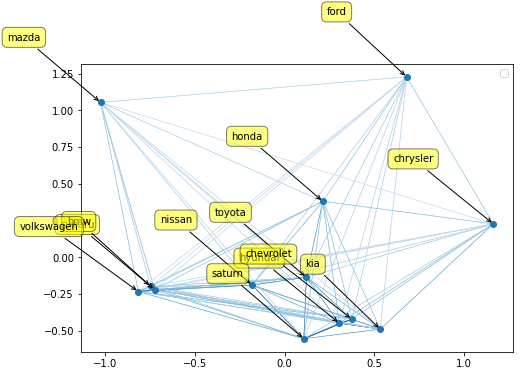

In [ ]:
# MDS
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
np.fill_diagonal(df3.values, 0)
similarities = euclidean_distances(df3)
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
# Rotate the data
clf = PCA(n_components=2)
df3 = clf.fit_transform(df3)
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
s = 100
#plt.scatter(df3[:, 0], df3[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)
#matplotlib.pyplot.annotate(text, xy, *args, **kwargs)[source]
similarities = similarities.max() / (similarities) * 100
np.fill_diagonal(similarities, 0)
# Plot the edges
#start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[df3[i, :], df3[j, :]]
            for i in range(len(df3)) for j in range(len(df3))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(np.full(len(segments), 0.5))
ax.add_collection(lc)
#test out adding labels
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    df3[:, 0], df3[:, 1], marker = 'o'
    )
#plt.yticks(np.arange(min, max, step))
for label, x, y in zip(top_13_brands, df3[:, 0], df3[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-60, 60),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

# Task B

Task B
Chevrolet and Saturn have the highest lift ratio with a lift value of 5.71. Our comments come from 2007 so it makes sense that Saturn is being discussed since Saturn didn't cease operations until 2010. Such a high association between these two brands when talking about midsize sedans tells us that their sedan models are frequently being compared to each other. This is useful for the brand manager of each brand as it is an indication of who their main competitor is. The sedans for Chevrolet and Saturn have almost identical qualities in most aspects, such as pricing, engine, highway mileage, and overall user ratings. They are being looked at as substitutes by buyers even in terms of the design. Brand managers could use this information to add something that buyers would value to their specific model which could make it stand out against the competitor.


The MDS shows us that Subaru and BMW are perceived similarly and show up in the same comment frequently so they are probably compared to each other often. This is a little surprising since BMW is a luxury German brand and Subaru is a non-luxury Japanese brand. We might have expected to see another German luxury brand such as Audi being associated with BMW instead. The performance features of the BMW and Subaru midsize sedans are fairly similar, but the BMW is more expensive. The difference we see in price could purely be due to the brand name that BMW has.  This insight could be valuable to Subaru because they see users associating their sedan model with a luxury sedan model. They could advertise this fact to make their sedan seem more desirable and drive sales. 



# Task C

In [ ]:
# For Task C

count = []
for i in range(len(comments_copy)):
    count+=comments_copy['final_comments'][i]

word_freq = nltk.FreqDist(count)

top_words = word_freq.most_common(500)
top_words[:80]

[('car', 2349),
 ('honda', 2091),
 ('like', 1372),
 ('ford', 1359),
 ('would', 1300),
 ('one', 1195),
 ('dont', 1191),
 ('think', 1101),
 ('toyota', 989),
 ('get', 969),
 ('good', 901),
 ('much', 838),
 ('new', 830),
 ('well', 770),
 ('even', 763),
 ('better', 746),
 ('also', 716),
 ('v6', 706),
 ('years', 662),
 ('time', 652),
 ('im', 651),
 ('see', 629),
 ('know', 617),
 ('really', 602),
 ('hyundai', 571),
 ('nissan', 569),
 ('make', 566),
 ('people', 557),
 ('way', 557),
 ('less', 554),
 ('say', 544),
 ('still', 534),
 ('engine', 529),
 ('thats', 518),
 ('could', 509),
 ('many', 502),
 ('sedan', 498),
 ('going', 483),
 ('miles', 467),
 ('year', 465),
 ('drive', 462),
 ('lot', 454),
 ('buy', 452),
 ('right', 452),
 ('something', 452),
 ('doesnt', 444),
 ('go', 442),
 ('want', 429),
 ('back', 426),
 ('price', 422),
 ('sure', 414),
 ('since', 409),
 ('last', 408),
 ('driving', 406),
 ('may', 405),
 ('6', 398),
 ('thing', 397),
 ('never', 394),
 ('actually', 392),
 ('4', 388),
 ('look',

In [ ]:
# Attributes are pulled manually from above
top_5_attributes = ['v6','engine','miles','power','price'] 

new_df2 = pd.DataFrame(columns = top_5_attributes)

def attribute_mentioned(item):
    if attribute in item:
        return 1
    else:
        return 0
      
for attribute in top_5_attributes:
    new_df2[attribute] = comments_copy['final_comments'].apply(attribute_mentioned)

df4=pd.DataFrame(columns = top_13_brands[:5])
for i in range(len(top_5_attributes)):
    for j in range(len(top_13_brands[:5])):
          numerator = ((new_df2[top_5_attributes[i]] + new_df[top_13_brands[j]]) > 1).sum()
          denominator = new_df2[top_5_attributes[i]].sum()*new_df[top_13_brands[j]].sum()
          lift = numerator*len(new_df)/denominator
          df4.loc[top_5_attributes[i],top_13_brands[j]] = lift
      
df4

,honda,ford,toyota,hyundai,nissan
v6,1.45978,1.81353,1.61121,1.47597,1.40647
engine,1.00349,1.57878,1.19462,0.993183,1.39534
miles,1.31081,1.1975,0.920186,1.10629,1.129
power,1.16459,1.33595,1.48609,1.18605,1.29151
price,1.45059,1.11596,1.60534,2.01277,1.27021


# Task D

Advice to the product manager and the marketing team: 

For Honda, the top two attributes are V6 and price. The strong association between Honda and V6 could be because they have two models they are known for: a V6 and a V4. The association with price is probably due to the fact that Honda is more affordable and people were advising it based on price. It also has a higher lift than the other cars in miles so it is possible that it has better mileage. A marketing/advertising manager could advertise the hybrid model that has a V6 and an electric motor to lower the fuel consumption. We would advise the product manager to focus the production on one hybrid model to benefit from high scale production costs and propose this model with a lower price. In doing so, the marketing team will promote a car with all the attributes that the consumers are looking for: a v6, a low fuel consumption and an affordable price. Therefore, the marketing team should promote the reasonable price the brand is offering for a V6 motor to offset this lack in quality perceived by the consumer.

It seems that Ford is strongly associated with the attribute “engine” which is proof of their strong reputation in the American market. Also when Ford is mentioned, we see miles being associated with it, so we can assume that their model is reliable due to its engine. It seems that their model is equipped with a V6, which is appreciated by the consumers. We advise the product manager to keep focusing on the engine and the power since those are attractive qualities about Ford sedans. To the marketing team we would recommend continuing their strategy if they want their brand to be perceived as unique. Indeed, as we have seen in the MDS, Ford is not strongly associated with any other brand. To attract American consumers who might be attracted to European brands such as BMW with which the dissimilarities are the strongest, they should focus their strategy on promoting their performance through the power the car can deliver, which is higher than most of the other car brands. 

Toyota is seen as a good manufacturer for the V6 engine, but it seems that other engines are not discussed like how they were for Ford. For the price, Toyota seems to be very affordable but the brand is associated with low quality since it has low reliability. The product manager should improve the fuel consumption since the attribute “miles” is not strongly associated with Toyota compared to the concurrence.So even though the price is low, it still isn’t cost effective. The marketing team needs to double their effort on that aspect, focusing on the v6 motor and its high power, and not only on their low prices when compared to Nissan and Ford. 

Hyundai is perceived favorably in terms of price and quality. Since the price is very low, people are not associating the brand with a great engine. The product manager should improve the fuel consumption to compete with brands like Ford and Honda. Regarding the marketing team, they should highlight the reliability of their engine, which is especially good for the price it comes for. 

Nissan: The V6 has a high association with the brand, so we can assume that the brand is famous for its models equipped with a V6 since their engines have a great reputation and are fairly priced. The product manager should work on the fuel consumption which is the lowest lift value for the attributes. The marketing team should focus on how well balanced the Nissan sedan is in every aspect such as price, engine, and fuel consumption. This can help differentiate its brand name from other brands such as Toyota, Honda, or Hyundai, which have major issues in fuel consumption or lack of power. 


# Task E

In [ ]:
# For Task E WITHOUT FINDING ALL BIGRAMS

new_series = pd.Series

def aspiration_mentioned(item):
    if 'would' in item:
      if (['like','love','enjoy','want','buy','purchase','get'] in item):
        return 1
    elif 'dream' in item:
      return 1
    else:
        return 0

for comment in comments_copy['final_comments']:
    new_series = comments_copy['final_comments'].map(aspiration_mentioned)

df5=pd.DataFrame(columns = top_13_brands)
for col in df5.columns:
    df5[col].values[:] = 0

for j in range(len(top_13_brands)):
  numerator = ((new_series + new_df[top_13_brands[j]]) > 1).sum()
  denominator = new_series.sum()*new_df[top_13_brands[j]].sum()
  lift = numerator*len(new_df)/denominator
  df5.loc['aspiration',top_13_brands[j]] = lift
      
df5

,honda,ford,toyota,hyundai,nissan,mazda,chevrolet,saturn,chrysler,subaru,kia,bmw,volkswagen
aspiration,1.0248,1.05119,2.16669,1.25094,2.51067,6.51324,0,0,0,0,0,5.95238,0


The most aspirational brand is Mazda with a lift of 6.51 followed next by BMW with a 5.95 lift value. 

Our analysis searched for aspirational pairs of words in terms of showing people actually wanting to buy the car, such as 'would like', 'would love', 'would enjoy', etc within the comments. One drawback to our code is that we did not find these aspirational terms with bigrams. Instead, we just looked for comments that contained both words of each pair. This means that we may also be counting comments that do not include these words directly following each other, but for this project, we will assume that every comment including both words of any pair contain that corresponding bigram. Although it may have made the analysis less accurate, it helped increase the simplicity and speed of the code. We also included the term 'dream' to consider any comment with the pair 'dream to' as the word 'to' was a stop word which was removed from the tokenized list created from the original comments. We then looked at which brands were most closely associated with these aspirational words in the comments by calculating their corresponding lifts.

Having an incredibly high aspirational lift, it appears that Mazda and, to a slightly lesser extent, BMW are very desirable brands for midsize sedans. However, since these words are aspirational, they may not actually translate to sales. A further analysis could be to look at unit sales of the Mazda midsize sedan and see if they are in line with Mazda being the most desirable. If the sales seem low, the business could look into what's stopping people from actually buying. Maybe the verbage is 'I would buy the mazda if' a condition were true, such as a lower price, better mileage, etc. If they found that condition to change a hypothetical into an actual, then the unit sales could increase.